In [3]:
import pandas as pd
from pathlib import Path

In [4]:
textdir = Path("~/shared/RR-workshop-data/text_datasets").expanduser()
textdf = pd.read_csv("nyt_df_2023-10.csv", encoding = 'utf-8')
textdf.head()

,Unnamed: 0,abstract,web_url,snippet,lead_paragraph,source,multimedia,keywords,pub_date,document_type,...,headline.content_kicker,headline.print_headline,headline.name,headline.seo,headline.sub,byline.original,byline.person,byline.organization,print_section,print_page
0,0,The new chairman of the Senate Foreign Relatio...,https://www.nytimes.com/2023/09/30/us/politics...,The new chairman of the Senate Foreign Relatio...,"Senator Ben Cardin of Maryland, the new chairm...",The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...","[{'name': 'glocations', 'value': 'Egypt', 'ran...",2023-10-01T00:06:00+0000,article,...,NaN,NaN,NaN,NaN,NaN,By Karoun Demirjian,"[{'firstname': 'Karoun', 'middlename': None, '...",NaN,NaN,NaN
1,1,The Senate overwhelmingly passed a bill to fun...,https://www.nytimes.com/interactive/2023/09/30...,The Senate overwhelmingly passed a bill to fun...,The Senate overwhelmingly passed a bill to fun...,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...","[{'name': 'subject', 'value': 'Shutdowns (Inst...",2023-10-01T00:06:25+0000,multimedia,...,NaN,NaN,NaN,NaN,NaN,"By Lazaro Gamio, Alicia Parlapiano, Jasmine C....","[{'firstname': 'Lazaro', 'middlename': None, '...",NaN,NaN,NaN
2,2,"In much of Europe, the election in Slovakia wa...",https://www.nytimes.com/2023/09/30/world/europ...,"In much of Europe, the election in Slovakia wa...",A Russia-friendly populist party finished firs...,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...","[{'name': 'glocations', 'value': 'Slovakia', '...",2023-10-01T00:18:47+0000,article,...,NaN,NaN,NaN,NaN,NaN,By Andrew Higgins,"[{'firstname': 'Andrew', 'middlename': None, '...",NaN,NaN,NaN
3,3,"Gideon Cody, who orchestrated a widely critici...",https://www.nytimes.com/2023/09/30/us/marion-k...,"Gideon Cody, who orchestrated a widely critici...","The police chief of Marion, Kansas, was suspen...",The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...","[{'name': 'subject', 'value': 'Newspapers', 'r...",2023-10-01T00:47:45+0000,article,...,NaN,Police Chief Who Ordered Newspaper Raid Is Sus...,NaN,NaN,NaN,By Orlando Mayorquin,"[{'firstname': 'Orlando', 'middlename': None, ...",NaN,A,21.0
4,4,The assistant general manager of the Calgary F...,https://www.nytimes.com/2023/09/30/sports/chri...,The assistant general manager of the Calgary F...,"Chris Snow, the assistant general manager of t...",The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...","[{'name': 'persons', 'value': 'Snow, Chris', '...",2023-10-01T01:38:51+0000,article,...,NaN,"Chris Snow, 42, Hockey Executive Who ‘Never St...",NaN,NaN,NaN,By Sopan Deb,"[{'firstname': 'Sopan', 'middlename': None, 'l...",NaN,B,10.0


In [7]:
textdf.columns

Index(['Unnamed: 0', 'abstract', 'web_url', 'snippet', 'lead_paragraph',
       'source', 'multimedia', 'keywords', 'pub_date', 'document_type',
       'news_desk', 'section_name', 'subsection_name', 'type_of_material',
       '_id', 'word_count', 'uri', 'headline.main', 'headline.kicker',
       'headline.content_kicker', 'headline.print_headline', 'headline.name',
       'headline.seo', 'headline.sub', 'byline.original', 'byline.person',
       'byline.organization', 'print_section', 'print_page'],
      dtype='object')

In [10]:
textdf_sub = textdf.loc[:, ['headline.main', 'pub_date', 'byline.person', 'word_count', 'keywords', 'document_type', 'news_desk', 'section_name', 'subsection_name', 'abstract', 'lead_paragraph']]
textdf_sub['key_text'] = textdf[['abstract', 'lead_paragraph', 'headline.main']].apply(lambda row: '\n'.join(row.values.astype(str)), axis = 1)
textdf_sub.head()


,headline.main,pub_date,byline.person,word_count,keywords,document_type,news_desk,section_name,subsection_name,abstract,lead_paragraph,key_text
0,Senate Democrat Threatens to Block More of Mil...,2023-10-01T00:06:00+0000,"[{'firstname': 'Karoun', 'middlename': None, '...",681,"[{'name': 'glocations', 'value': 'Egypt', 'ran...",article,Washington,U.S.,Politics,The new chairman of the Senate Foreign Relatio...,"Senator Ben Cardin of Maryland, the new chairm...",The new chairman of the Senate Foreign Relatio...
1,How Each Member Voted on the Senate Stopgap Sp...,2023-10-01T00:06:25+0000,"[{'firstname': 'Lazaro', 'middlename': None, '...",0,"[{'name': 'subject', 'value': 'Shutdowns (Inst...",multimedia,Graphics,U.S.,Politics,The Senate overwhelmingly passed a bill to fun...,The Senate overwhelmingly passed a bill to fun...,The Senate overwhelmingly passed a bill to fun...
2,What Does a Russia-Leaning Party Win in an E.U...,2023-10-01T00:18:47+0000,"[{'firstname': 'Andrew', 'middlename': None, '...",1269,"[{'name': 'glocations', 'value': 'Slovakia', '...",article,Foreign,World,Europe,"In much of Europe, the election in Slovakia wa...",A Russia-friendly populist party finished firs...,"In much of Europe, the election in Slovakia wa..."
3,Police Chief Who Ordered Raid on Kansas Newspa...,2023-10-01T00:47:45+0000,"[{'firstname': 'Orlando', 'middlename': None, ...",623,"[{'name': 'subject', 'value': 'Newspapers', 'r...",article,Express,U.S.,NaN,"Gideon Cody, who orchestrated a widely critici...","The police chief of Marion, Kansas, was suspen...","Gideon Cody, who orchestrated a widely critici..."
4,"Chris Snow, Hockey Executive Who Publicly Face...",2023-10-01T01:38:51+0000,"[{'firstname': 'Sopan', 'middlename': None, 'l...",729,"[{'name': 'persons', 'value': 'Snow, Chris', '...",article,Sports,Sports,NaN,The assistant general manager of the Calgary F...,"Chris Snow, the assistant general manager of t...",The assistant general manager of the Calgary F...


# Lemmatization (be consistent and use same process as in previous nbs!!)

In [12]:
# lemmatization (optional step)
import spacy
import re
nlp = spacy.load("en_core_web_sm")

def lemmatizeAbstracts(x):
    doc = nlp(x)
    new_text = []
    for token in doc:
        new_text.append(token.lemma_)
    text_string = " ".join(new_text)
    # getting rid of non-word characters
    text_string = re.sub(r"[^\w\s]+", "", text_string)
    text_string = re.sub(r"\s{2,}", " ", text_string)
    return text_string

textdf_sub["keytext_lemma"] = textdf_sub["key_text"].apply(lemmatizeAbstracts)
textdf_sub.loc[:2, ['key_text', 'keytext_lemma']]

,key_text,keytext_lemma
0,The new chairman of the Senate Foreign Relatio...,the new chairman of the Senate Foreign Relatio...
1,The Senate overwhelmingly passed a bill to fun...,the Senate overwhelmingly pass a bill to fund ...
2,"In much of Europe, the election in Slovakia wa...",in much of Europe the election in Slovakia be ...


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words="english")
textdf_sub_tfidf = tfidf.fit_transform(textdf_sub["keytext_lemma"])
textdf_sub_tfidf.shape

(3906, 18627)

In [17]:
# creating a new TF-IDF matrix
tfidf = TfidfVectorizer(stop_words="english", ngram_range=(1,2), max_features=250, strip_accents="unicode", min_df=10, max_df=200)
tfidf_lemma_array = tfidf.fit_transform(textdf_sub["keytext_lemma"])
textdf_sub_tfidf = pd.DataFrame(tfidf_lemma_array.toarray(), index=textdf_sub.index, columns=tfidf.get_feature_names_out())
print(textdf_sub_tfidf.shape)
textdf_sub_tfidf.describe()


(3906, 250)


,10,2023,accord,accuse,administration,age,ago,aid,america,americans,...,win,woman,word,wordle,write,writer,year old,york city,york times,young
count,3906.000000,3906.000000,3906.000000,3906.000000,3906.000000,3906.000000,3906.000000,3906.000000,3906.000000,3906.000000,...,3906.000000,3906.000000,3906.000000,3906.000000,3906.000000,3906.000000,3906.000000,3906.000000,3906.000000,3906.000000
mean,0.008175,0.012723,0.009153,0.006394,0.007711,0.007252,0.009766,0.008459,0.009678,0.007008,...,0.010274,0.018514,0.008765,0.005443,0.010160,0.007622,0.009175,0.009485,0.008634,0.010904
std,0.058581,0.078944,0.055288,0.051312,0.057468,0.052148,0.055744,0.060286,0.061756,0.053582,...,0.062240,0.089031,0.065849,0.060165,0.063591,0.056236,0.058733,0.066634,0.056206,0.065807
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.840300,0.753513,0.746948,0.819091,0.819836,0.785870,0.582129,0.746947,0.804719,0.752271,...,0.975347,1.000000,0.837742,0.693447,1.000000,1.000000,0.853765,0.908715,0.705355,0.854290


In [19]:
# using PCA to reduce the dimensionality
from sklearn.decomposition import PCA # dimensionality reduction
pca = PCA(n_components=10, whiten=False, random_state=42)
text_pca = pca.fit_transform(textdf_sub_tfidf)
df_text_pca = pd.DataFrame(data = text_pca)

In [21]:
from sklearn.cluster import KMeans, DBSCAN # clustering algorithms

def elbowPlot(range_, data, figsize=(10,10)):
    '''
    the elbow plot function helps to figure out the right amount of clusters for a dataset
    '''
    inertia_list = []
    for n in range_:
        kmeans = KMeans(n_clusters=n, random_state=42)
        kmeans.fit(data)
        inertia_list.append(kmeans.inertia_)
        
    # plotting
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)
    sns.lineplot(y=inertia_list, x=range_, ax=ax)
    ax.set_xlabel("Cluster")
    ax.set_ylabel("Inertia")
    ax.set_xticks(list(range_))
    fig.show()
    fig.savefig("elbow_plot.png")


In [20]:
def progressiveFeatureSelection(df, n_clusters=3, max_features=4,):
    '''
    very basic implementation of an algorithm for feature selection (unsupervised clustering); inspired by this post: https://datascience.stackexchange.com/questions/67040/how-to-do-feature-selection-for-clustering-and-implement-it-in-python
    '''
    feature_list = list(df.columns)
    selected_features = list()
    # select starting feature
    initial_feature = ""
    high_score = 0
    for feature in feature_list:
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        data_ = df[feature]
        labels = kmeans.fit_predict(data_.to_frame())
        score_ = silhouette_score(data_.to_frame(), labels)
        print("Proposed new feature {} with score {}". format(feature, score_))
        if score_ >= high_score:
            initial_feature = feature
            high_score = score_
    print("The initial feature is {} with a silhouette score of {}.".format(initial_feature, high_score))
    feature_list.remove(initial_feature)
    selected_features.append(initial_feature)
    for _ in range(max_features-1):
        high_score = 0
        selected_feature = ""
        print("Starting selection {}...".format(_))
        for feature in feature_list:
            selection_ = selected_features.copy()
            selection_.append(feature)
            kmeans = KMeans(n_clusters=n_clusters, random_state=42)
            data_ = df[selection_]
            labels = kmeans.fit_predict(data_)
            score_ = silhouette_score(data_, labels)
            print("Proposed new feature {} with score {}". format(feature, score_))
            if score_ > high_score:
                selected_feature = feature
                high_score = score_
        selected_features.append(selected_feature)
        feature_list.remove(selected_feature)
        print("Selected new feature {} with score {}". format(selected_feature, high_score))
    return selected_features

In [ ]:
scaler = SS()
DNP_authors_standardized = scaler.fit_transform(df_authors)
df_authors_standardized = pd.DataFrame(DNP_authors_standardized, columns=["word_count_standardized", "modern_translations_standardized", "known_works_standardized", "manuscripts_standardized", "early_editions_standardized", "early_translations_standardized", "modern_editions_standardized", "commentaries_standardized"])
df_authors_standardized = df_authors_standardized.set_index(df_authors.index)

In [ ]:
selected_features = progressiveFeatureSelection(df_authors_standardized, max_features=3, n_clusters=3)

In [ ]:
df_standardized_sliced = df_authors_standardized[selected_features]

In [ ]:
elbowPlot(range(1,11), df_standardized_sliced)

In [43]:
kmeans = KMeans(n_clusters=100, random_state=42)
abstracts_labels = kmeans.fit_predict(df_text_pca)
df_abstracts_labeled = textdf_sub.copy()
df_abstracts_labeled["cluster"] = abstracts_labels

c:\Users\F0040RP\Documents\DartLib_RDS\intro-to-python\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [59]:
abstracts_labels

array([ 1,  0, 33, ..., 30, 85, 53])

In [24]:
df_abstracts_labeled[df_abstracts_labeled["cluster"] == 75][["keytext_lemma", "cluster"]]

,keytext_lemma,cluster
4,the assistant general manager of the Calgary F...,75
177,with her own firm in San Francisco and a found...,75
789,a pyrotechnic funk and RB mainstay he be a vit...,75
1780,work separately from the scottish team that ha...,75
2122,her music which range from chamber miniature t...,75
2294,at a time when teen suicide be see as random a...,75
2487,know for the distinctively jazzy flavor of his...,75
3013,the technique he develop in the field of compl...,75
3310,row of new crab apple tree be be carefully pla...,75
3462,nan nan Treat Williams Actor Known for hair an...,75


<Axes: xlabel='pc_1', ylabel='pc_2'>

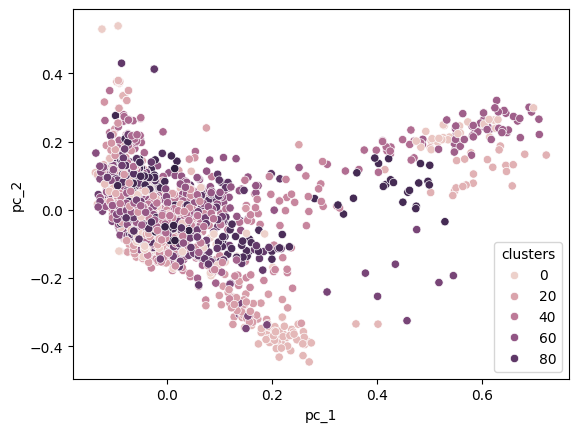

In [78]:
# using PCA to reduce the dimensionality
pca = PCA(n_components=2, whiten=False, random_state=42)
standardized_pca = pca.fit_transform(df_text_pca)
df_standardized_pca = pd.DataFrame(data=standardized_pca, columns=["pc_1", "pc_2"])
df_standardized_pca["clusters"] = abstracts_labels

# plotting the clusters with seaborn
import seaborn as sns
sns.scatterplot(x="pc_1", y="pc_2", hue="clusters", data=df_standardized_pca)

In [87]:
df_abstracts_labeled_sub = df_abstracts_labeled.loc[:, "headline.main"]

In [94]:
df_standardized_pca = pd.concat([df_standardized_pca, df_abstracts_labeled_sub], axis = 1)

In [95]:
import plotly.express as px
fig = px.scatter(df_standardized_pca, x="pc_1", y="pc_2", color="clusters", hover_data='headline.main')
fig.show()

In [79]:
df_standardized_pca

,pc_1,pc_2,clusters
0,-0.013978,-0.127010,1
1,0.106190,-0.135797,0
2,0.148595,-0.151227,33
3,-0.000985,-0.017369,51
4,-0.089641,-0.001266,75
...,...,...,...
3901,-0.058628,0.028560,71
3902,-0.041177,-0.007171,58
3903,-0.010803,-0.088106,30
3904,-0.030213,-0.035797,85


In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors # for selecting the optimal eps value when using DBSCAN
def findOptimalEps(n_neighbors, data):
    '''
    function to find optimal eps distance when using DBSCAN; based on this article: https://towardsdatascience.com/machine-learning-clustering-dbscan-determine-the-optimal-value-for-epsilon-eps-python-example-3100091cfbc
    '''
    neigh = NearestNeighbors(n_neighbors=n_neighbors)
    nbrs = neigh.fit(data)
    distances, indices = nbrs.kneighbors(data)
    distances = np.sort(distances, axis=0)
    distances = distances[:,1]
    plt.plot(distances)

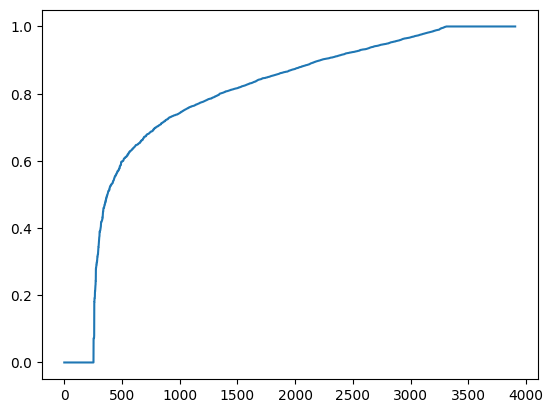

In [73]:
findOptimalEps(2, textdf_sub_tfidf)

In [74]:
dbscan = DBSCAN(eps=0.8, metric="euclidean")
dbscan_labels = dbscan.fit_predict(df_text_pca)
df_abstracts_dbscan = textdf_sub.copy()
df_abstracts_dbscan["cluster"] = dbscan_labels
df_abstracts_dbscan["cluster"].unique()

array([0], dtype=int64)

In [68]:
df_abstracts_dbscan[df_abstracts_dbscan["cluster"] == 1][["key_text", "cluster"]]

,key_text,cluster


In [69]:
set([item for item in dbscan_labels])

{0}

In [58]:
df_text_pca

,0,1,2,3,4,5,6,7,8,9
0,-0.013978,-0.127010,-0.044716,0.242725,-0.025963,-0.045249,-0.011766,0.075800,-0.005765,0.010508
1,0.106190,-0.135797,0.096387,0.024526,-0.030499,-0.060616,-0.004190,-0.045896,-0.037312,0.067584
2,0.148595,-0.151227,0.096840,0.199832,-0.072792,0.008445,-0.021414,0.228981,0.008268,-0.089336
3,-0.000985,-0.017369,-0.049409,0.108021,0.055116,0.003405,0.133412,-0.155542,0.016635,0.145353
4,-0.089641,-0.001266,-0.100691,-0.162318,0.171421,-0.167832,0.237042,0.318601,0.321098,0.068682
...,...,...,...,...,...,...,...,...,...,...
3901,-0.058628,0.028560,-0.035310,-0.106484,-0.068483,0.016131,-0.017148,-0.031526,-0.011258,-0.090744
3902,-0.041177,-0.007171,-0.009410,-0.028959,-0.062913,0.060935,-0.099575,-0.065586,-0.028886,0.015959
3903,-0.010803,-0.088106,-0.008131,0.224834,-0.065440,0.007043,0.005364,0.152107,0.007094,-0.041275
3904,-0.030213,-0.035797,-0.066207,0.052096,0.008626,-0.033936,0.057338,-0.117956,-0.001897,0.081374
